In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
sns.plotting_context(context='paper')
sns.set_palette('rainbow')

import pandas as pd
import prophet

In [71]:
transactions = pd.read_csv('../../../data/kaggle/spanish_retail_transactions.csv')

In [72]:
transactions['date'] = pd.to_datetime(transactions['date'])

<AxesSubplot:xlabel='date'>

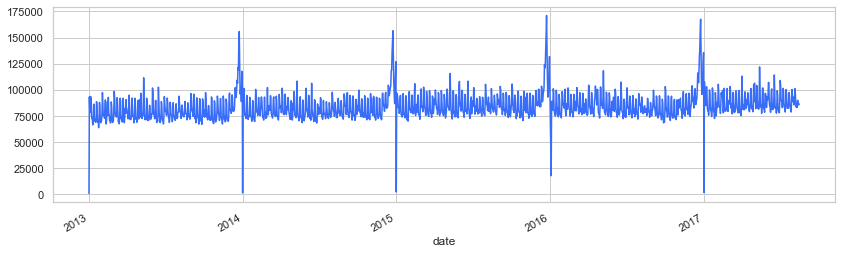

In [73]:
transactions_per_day = transactions.groupby('date')['transactions'].sum()
transactions_per_day.plot(figsize=(14, 4))

In [74]:
split_point = '2016-06-01'

training_data = transactions_per_day.loc[transactions_per_day.index < split_point]
validation_data = transactions_per_day.loc[transactions_per_day.index >= split_point]

training_data = training_data.reset_index().rename(columns={'date': 'ds', 'transactions': 'y'})

In [75]:
m = prophet.Prophet()
m.add_country_holidays(country_name='DE')

In [76]:
m.fit(training_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [77]:
prediction_timeframe = pd.DataFrame({'ds': pd.date_range(transactions_per_day.index.min(), transactions_per_day.index.max())})

In [78]:
forecast = m.predict(prediction_timeframe)

C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Linus Folkerts\.conda\envs\hackupc-demand-forecasting\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


<AxesSubplot:xlabel='ds'>

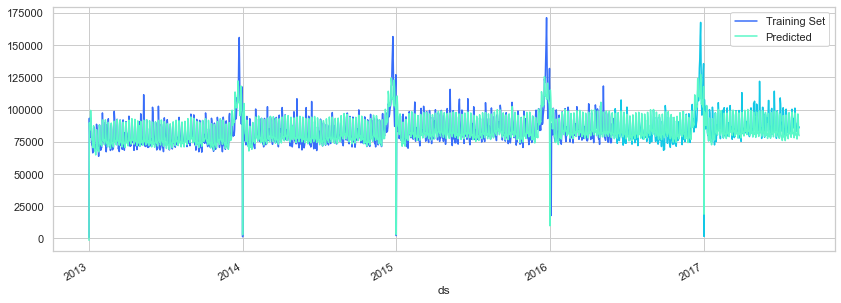

In [79]:
fig, ax = plt.subplots(figsize=(14, 5))

training_data.plot(ax=ax, x='ds', y='y', label='Training Set')
validation_data.plot(ax=ax, label='Validation Set')
forecast.plot(ax=ax, x='ds', y='yhat', label='Predicted')

In [80]:
m.train_holiday_names

0                      Neujahr
1                   Karfreitag
2                  Ostermontag
3                   Erster Mai
4          Christi Himmelfahrt
5                Pfingstmontag
6    Tag der Deutschen Einheit
7         Erster Weihnachtstag
8        Zweiter Weihnachtstag
dtype: object